# Statistical Analysis

In [ ]:
%pip install matplotlib
%pip install pandas
%pip install scipy

## Data Properties

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv('quantitative_data.csv',
                 true_values=['WAHR'],
                 false_values=['FALSCH'],
                )

interface_A = df[df['Interface'] == 'A']
interface_B = df[df['Interface'] == 'B']

### Task 1: Time Needed to See Which of My Tasks Are Due in the Next Days

In [3]:
task_1_time_A = interface_A['Task 1 Time [s]']
task_1_time_B = interface_B['Task 1 Time [s]']

In [4]:
display(task_1_time_A.describe(), task_1_time_B.describe())

count    12.000000
mean     14.750000
std       7.350015
min       4.000000
25%      10.750000
50%      13.000000
75%      17.000000
max      31.000000
Name: Task 1 Time [s], dtype: float64

count    12.000000
mean     13.583333
std       4.122187
min       7.000000
25%      11.000000
50%      13.000000
75%      15.750000
max      21.000000
Name: Task 1 Time [s], dtype: float64

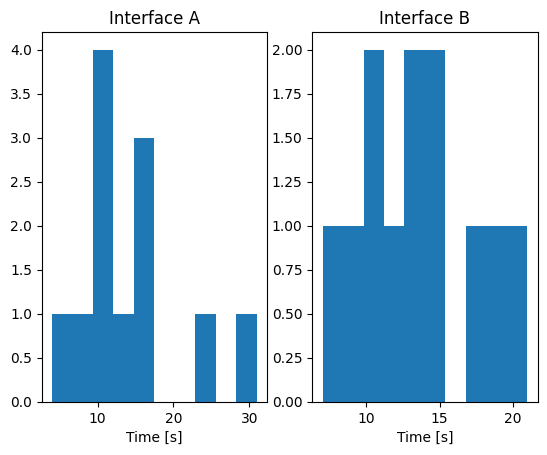

In [5]:
plt.subplot(1, 2, 1)
plt.hist(task_1_time_A)
plt.xlabel('Time [s]')
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.hist(task_1_time_B)
plt.xlabel('Time [s]')
plt.title('Interface B')
plt.show()

In [6]:
display(stats.shapiro(task_1_time_A), stats.shapiro(task_1_time_B))

ShapiroResult(statistic=0.9261507987976074, pvalue=0.3410911560058594)

ShapiroResult(statistic=0.9680989384651184, pvalue=0.889902651309967)

Even though the histograms don't look like typical normally distributed data, the Shapiro-Wilk test clearly shows that the data is normally distributed. The p-values for both interfaces are above 0.05, so our null hypothesis (the data is normally distributed) cannot be rejected.

In [7]:
stats.levene(task_1_time_A, task_1_time_B)

LeveneResult(statistic=1.642951833848873, pvalue=0.21326540639550026)

The Levene test shows that the variances of the two interfaces are equal. The p-value is above 0.05, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

### Task 2: Time Needed to Read the Information of any Task

In [8]:
task_2_time_A = interface_A['Task 2 Time [s]']
task_2_time_B = interface_B['Task 2 Time [s]']

In [9]:
display(task_2_time_A.describe(), task_2_time_B.describe())

count    12.000000
mean     12.666667
std       6.919450
min       4.000000
25%       7.750000
50%      10.000000
75%      19.250000
max      25.000000
Name: Task 2 Time [s], dtype: float64

count    12.000000
mean     20.000000
std      11.045361
min       8.000000
25%      11.750000
50%      15.500000
75%      29.000000
max      36.000000
Name: Task 2 Time [s], dtype: float64

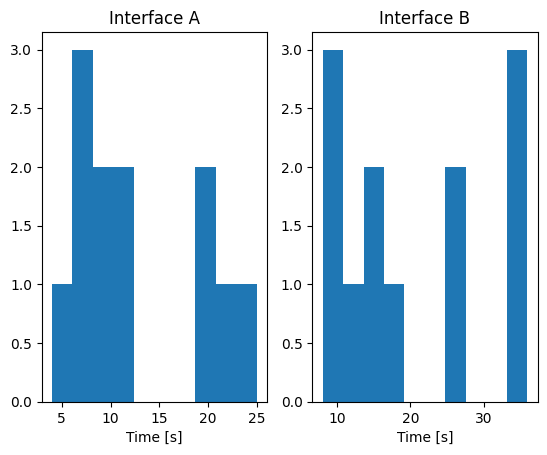

In [10]:
plt.subplot(1, 2, 1)
plt.hist(task_2_time_A)
plt.xlabel('Time [s]')
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.hist(task_2_time_B)
plt.xlabel('Time [s]')
plt.title('Interface B')
plt.show()

In [11]:
display(stats.shapiro(task_2_time_A), stats.shapiro(task_2_time_B))

ShapiroResult(statistic=0.8798807859420776, pvalue=0.08733870834112167)

ShapiroResult(statistic=0.8599857091903687, pvalue=0.04886643588542938)

While the data for interface A is normally distributed, the data for interface B is not. The Shapiro-Wilk test shows that the p-value for interface B is below 0.05, so our null hypothesis (the data is normally distributed) can be rejected for interface B.

In [12]:
stats.levene(task_2_time_A, task_2_time_B)

LeveneResult(statistic=2.2891424075531073, pvalue=0.14451591105326236)

The Levene test shows that the variances of the two interfaces are equal. The p-value is above 0.05, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

### Task 3: Reading the full and correct information of a task
This task was interwoven with tasks 1 and 2, because the participants had to find a hidden message by themselves. The message prompted the participant to announce to the experimenter that they had found it.

In [13]:
task_3_found_message_A = interface_A['Hidden message noticed']
task_3_found_message_B = interface_B['Hidden message noticed']

In [14]:
display(task_3_found_message_A.describe(), task_3_found_message_B.describe())

count        12
unique        2
top       False
freq         10
Name: Hidden message noticed, dtype: object

count        12
unique        2
top       False
freq         10
Name: Hidden message noticed, dtype: object

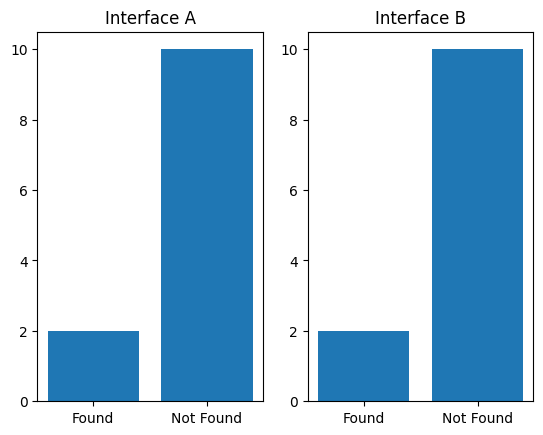

In [15]:
plt.subplot(1, 2, 1)
plt.bar(['Found', 'Not Found'], [task_3_found_message_A.sum(), task_3_found_message_A.count() - task_3_found_message_A.sum()])
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.bar(['Found', 'Not Found'], [task_3_found_message_B.sum(), task_3_found_message_B.count() - task_3_found_message_B.sum()])
plt.title('Interface B')
plt.show()

### NASA TLX
While the effects on the NASA TLX scores were not originally accounted for when stating our null hypotheses, we will still include them now. Only the raw scores for the NASA TLX, i.e. the unweighted sum of the scores for each dimension, are used.

In [16]:
nasa_tlx_A = interface_A.filter(like="TLX").sum(axis=1)
nasa_tlx_B = interface_B.filter(like="TLX").sum(axis=1)

In [17]:
display(nasa_tlx_A.describe(), nasa_tlx_B.describe())

count    12.000000
mean     37.083333
std      10.697989
min      20.000000
25%      31.000000
50%      36.000000
75%      41.250000
max      59.000000
dtype: float64

count    12.000000
mean     30.500000
std      12.325141
min      12.000000
25%      22.250000
50%      30.500000
75%      39.500000
max      52.000000
dtype: float64

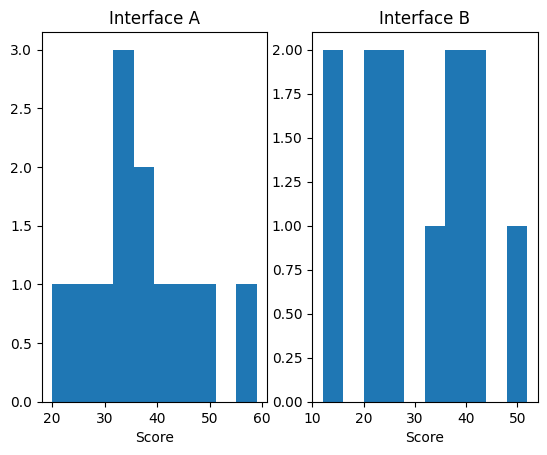

In [18]:
plt.subplot(1, 2, 1)
plt.hist(nasa_tlx_A)
plt.xlabel('Score')
plt.title('Interface A')
plt.subplot(1, 2, 2)
plt.hist(nasa_tlx_B)
plt.xlabel('Score')
plt.title('Interface B')
plt.show()

## Statistical Tests
The data from task 1 is normally distributed and homoscedastic, so a paired t-test is appropriate. The data from task 2 however is not normally distributed, so a Wilcoxon signed-rank test is more appropriate.

### Task 1: Time Needed to See Which of My Tasks Are Due in the Next Days
Task 1 data is normally distributed and homoscedastic, so a paired t-test is appropriate.

In [19]:
stats.ttest_rel(task_1_time_A, task_1_time_B)

TtestResult(statistic=0.8102570230252584, pvalue=0.4349715466165315, df=11)

The p-value from the paired t-test is above 0.05, so our null hypothesis (there is no difference between interface A and B in terms of time needed to see which of the users tasks are due in the next days) cannot be rejected. There is no statistical evidence suggesting that one interface is better than the other in this regard.

### Task 2: Time Needed to Read the Information of any Task
Task 2 data is not normally distributed, so a Wilcoxon signed-rank test is appropriate.

In [20]:
stats.wilcoxon(task_2_time_A, task_2_time_B)

WilcoxonResult(statistic=4.0, pvalue=0.00341796875)

The p-value from the Wilcoxon signed-rank test is below 0.05, so our null hypothesis (there is no difference between interface A and B in terms of time needed to read the information of any task) can be rejected. There is a statistically significant difference between the two interfaces concerning this metric.

### Task 3: Reading the full and correct information of a task
TODO

### Task 3: NASA TLX
This is ordinal data, so a Wilcoxon signed-rank test is appropriate.

In [21]:
stats.wilcoxon(nasa_tlx_A, nasa_tlx_B)

/Users/uni/Documents/HS23/Human Computer Interaction/hci-project-hci2023-group-25/Deliverables/Study/.venv/lib/python3.12/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=7.0, pvalue=0.020418612859613723)

We can set up a new null hypothesis: There is no difference between interface A and B in terms of the NASA TLX scores.

The p-value from the Wilcoxon signed-rank test is below 0.05, so our null hypothesis from above can be rejected. There is a statistically significant difference between the two interfaces on the TLX score.